In [68]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, f1_score
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import TimeSeriesSplit
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import numpy as np
from joblib import dump, load

In [52]:
df = pd.read_csv('Resources/sales.csv')
df.head()

,Date,Store,Product,Is_Holiday,Base Price,Price,Weekly_Units_Sold,weekly_sales,year,month,day,week_of_year,promotion
0,2010-02-05,1,1,False,9.99,7.99,245,1957.55,2010,2,5,5,1
1,2010-02-12,1,1,True,9.99,7.99,453,3619.47,2010,2,12,6,1
2,2010-02-19,1,1,False,9.99,7.99,409,3267.91,2010,2,19,7,1
3,2010-02-26,1,1,False,9.99,7.99,191,1526.09,2010,2,26,8,1
4,2010-03-05,1,1,False,9.99,9.99,145,1448.55,2010,3,5,9,0


In [53]:
df=df.drop(columns=['Date', 'year', 'day', 'month','weekly_sales'])
df.head()

,Store,Product,Is_Holiday,Base Price,Price,Weekly_Units_Sold,week_of_year,promotion
0,1,1,False,9.99,7.99,245,5,1
1,1,1,True,9.99,7.99,453,6,1
2,1,1,False,9.99,7.99,409,7,1
3,1,1,False,9.99,7.99,191,8,1
4,1,1,False,9.99,9.99,145,9,0


In [54]:
df=df[['Store','Product','week_of_year','Base Price','Price','promotion','Is_Holiday','Weekly_Units_Sold']]
df.head()

,Store,Product,week_of_year,Base Price,Price,promotion,Is_Holiday,Weekly_Units_Sold
0,1,1,5,9.99,7.99,1,False,245
1,1,1,6,9.99,7.99,1,True,453
2,1,1,7,9.99,7.99,1,False,409
3,1,1,8,9.99,7.99,1,False,191
4,1,1,9,9.99,9.99,0,False,145


In [55]:
df['Temp']='_'
df['Store'] = df['Temp'].str.cat(df['Store'].values.astype(str))
df['Product'] = df['Temp'].str.cat(df['Product'].values.astype(str))
df['week_of_year'] = df['Temp'].str.cat(df['week_of_year'].values.astype(str))
del df['Temp']
df.head()

,Store,Product,week_of_year,Base Price,Price,promotion,Is_Holiday,Weekly_Units_Sold
0,_1,_1,_5,9.99,7.99,1,False,245
1,_1,_1,_6,9.99,7.99,1,True,453
2,_1,_1,_7,9.99,7.99,1,False,409
3,_1,_1,_8,9.99,7.99,1,False,191
4,_1,_1,_9,9.99,9.99,0,False,145


In [56]:
#  LabelEncoding Is_Holiday column
df['Is_Holiday']=LabelEncoder().fit_transform(df['Is_Holiday'])
df.head()

,Store,Product,week_of_year,Base Price,Price,promotion,Is_Holiday,Weekly_Units_Sold
0,_1,_1,_5,9.99,7.99,1,0,245
1,_1,_1,_6,9.99,7.99,1,1,453
2,_1,_1,_7,9.99,7.99,1,0,409
3,_1,_1,_8,9.99,7.99,1,0,191
4,_1,_1,_9,9.99,9.99,0,0,145


In [57]:
df.to_csv("Resources/preprocessed.csv")

In [58]:
sc1=df[df['Product']=='_1']
sc2=df[df['Product']=='_2']
sc3=df[df['Product']=='_3']

In [59]:
# Create features
X=df.drop(columns=['Weekly_Units_Sold'], axis = 1)

X=pd.get_dummies(X)

# Create target. 
y = df['Weekly_Units_Sold']

In [60]:
X

,Base Price,Price,promotion,Is_Holiday,Store__1,Store__10,Store__2,Store__3,Store__4,Store__5,...,week_of_year__48,week_of_year__49,week_of_year__5,week_of_year__50,week_of_year__51,week_of_year__52,week_of_year__6,week_of_year__7,week_of_year__8,week_of_year__9
0,9.99,7.99,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,9.99,7.99,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,9.99,7.99,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,9.99,7.99,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,9.99,9.99,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3856,19.99,19.99,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3857,19.99,19.99,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3858,19.99,19.99,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3859,19.99,19.99,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
X.describe()

,Base Price,Price,promotion,Is_Holiday,Store__1,Store__10,Store__2,Store__3,Store__4,Store__5,...,week_of_year__48,week_of_year__49,week_of_year__5,week_of_year__50,week_of_year__51,week_of_year__52,week_of_year__6,week_of_year__7,week_of_year__8,week_of_year__9
count,3861.000000,3861.000000,3861.000000,3861.000000,3861.000000,3861.000000,3861.000000,3861.000000,3861.000000,3861.000000,...,3861.000000,3861.000000,3861.000000,3861.000000,3861.000000,3861.000000,3861.000000,3861.000000,3861.000000,3861.000000
mean,12.554103,11.766084,0.172494,0.069930,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,...,0.013986,0.013986,0.020979,0.013986,0.013986,0.013986,0.020979,0.020979,0.020979,0.020979
std,6.079043,5.976196,0.377858,0.255062,0.314310,0.314310,0.314310,0.314310,0.314310,0.314310,...,0.117448,0.117448,0.143333,0.117448,0.117448,0.117448,0.143333,0.143333,0.143333,0.143333
min,5.990000,4.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.990000,5.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10.990000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,19.990000,19.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,21.990000,21.990000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Linear Regression

In [16]:
# # Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Scale the data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# Create and train the model
model = LinearRegression().fit(X_train_scaled, y_train)

# Generate predictions
y_pred = model.predict(X_test_scaled)


In [18]:
#  Score Data
training_score = model.score(X_train_scaled, y_train)
testing_score = model.score(X_test_scaled, y_test)

score = r2_score(y_test, y_pred)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")
print('---------------------')
print(f"R2 Score: {score}")

Training Score: 0.634189732403384
Testing Score: 0.44620427152990716
---------------------
R2 Score: 0.44620427152990716


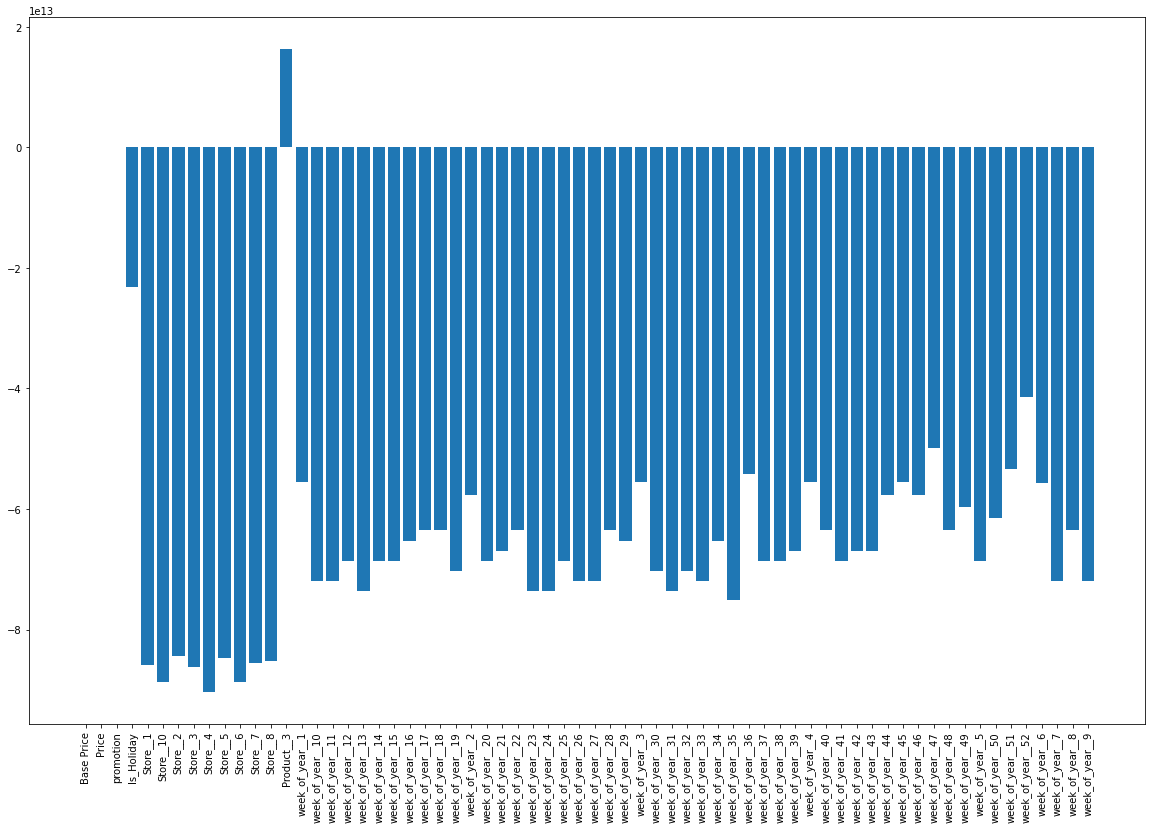

In [19]:
# Visualizing the regression coefficients. 
plt.rcParams["figure.figsize"] = (20,13)
plt.xticks(rotation=90)
plt.bar(X_train.columns, model.coef_,)
plt.show()

## Lasso Regression 

In [20]:
# Create and train the model
model = Lasso(max_iter=10000).fit(X_train_scaled, y_train)

# Generate predictions
y_pred = model.predict(X_test_scaled)


In [21]:
#  Score Data
training_score = model.score(X_train_scaled, y_train)
testing_score = model.score(X_test_scaled, y_test)

score = r2_score(y_test, y_pred)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")
print('---------------------')
print(f"R2 Score: {score}")

Training Score: 0.6285707950065009
Testing Score: 0.47396446151470073
---------------------
R2 Score: 0.47396446151470073


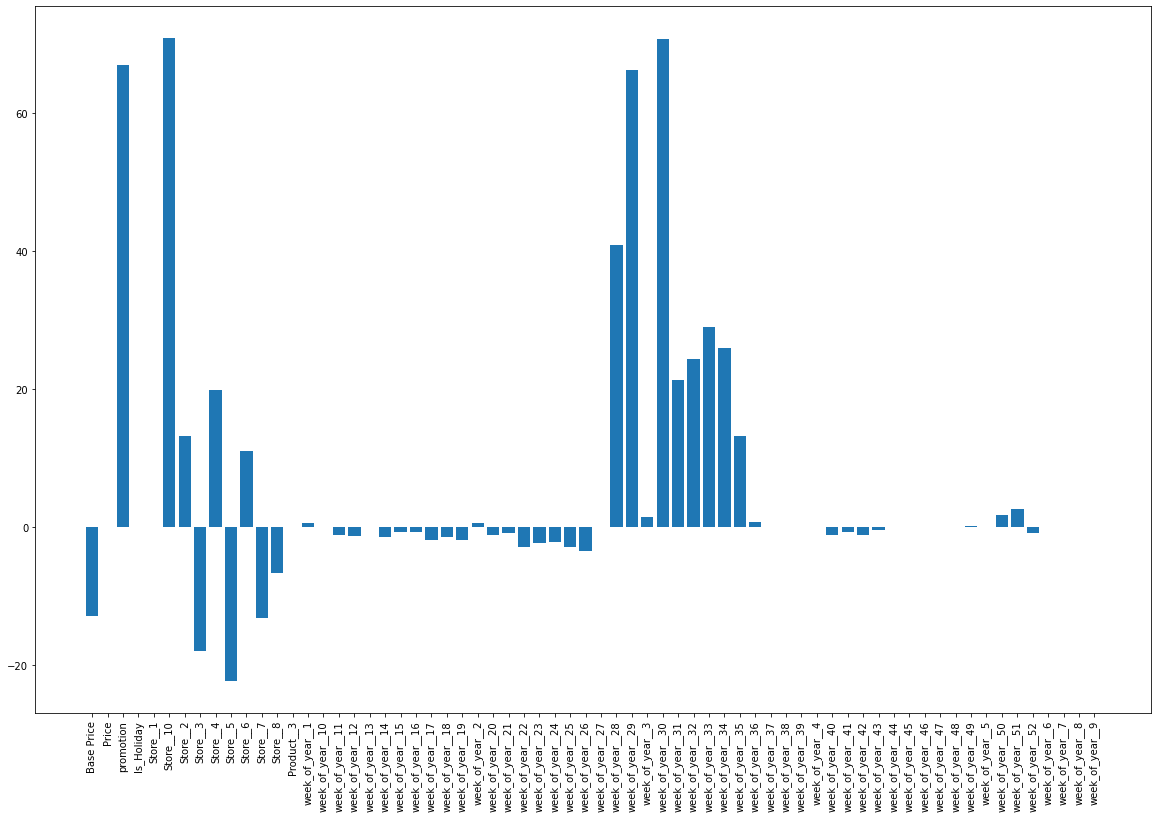

In [22]:
# Visualizing the regression coefficients. 
plt.rcParams["figure.figsize"] = (20,13)
plt.xticks(rotation=90)
plt.bar(X_train.columns, model.coef_)
plt.show()

## Ridge

In [23]:
# Create and train the model
model = Ridge(alpha=100).fit(X_train_scaled, y_train)

# Generate predictions
y_pred = model.predict(X_test_scaled)

In [24]:
#  Score Data
training_score = model.score(X_train_scaled, y_train)
testing_score = model.score(X_test_scaled, y_test)

score = r2_score(y_test, y_pred)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")
print('---------------------')
print(f"R2 Score: {score}")

Training Score: 0.6255202086981164
Testing Score: 0.5064363144775736
---------------------
R2 Score: 0.5064363144775736


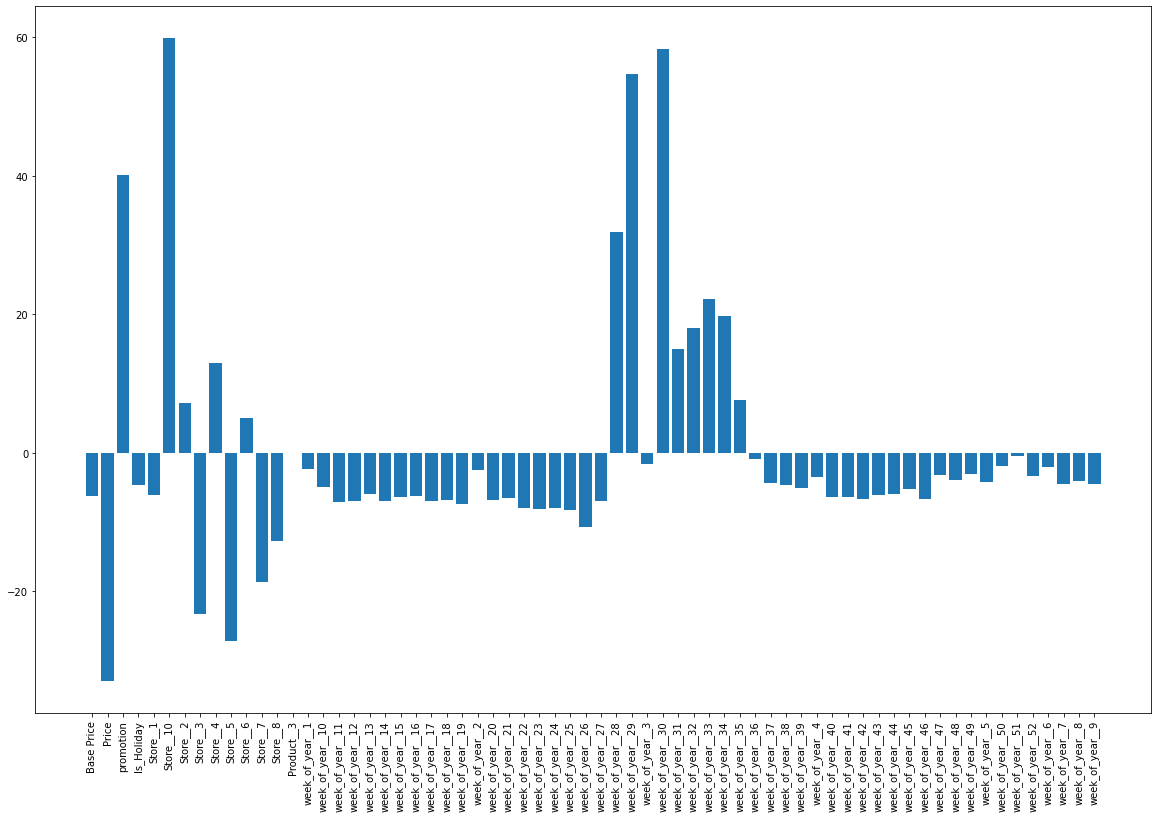

In [25]:
# Visualizing the regression coefficients. 
plt.rcParams["figure.figsize"] = (20,13)
plt.xticks(rotation=90)
plt.bar(X_train.columns, model.coef_)
plt.show()

## ElasticNet

In [26]:
# Create and train the model
model = ElasticNet(alpha=10).fit(X_train_scaled, y_train)

# Generate predictions
y_pred = model.predict(X_test_scaled)

In [27]:
#  Score Data
training_score = model.score(X_train_scaled, y_train)
testing_score = model.score(X_test_scaled, y_test)

score = r2_score(y_test, y_pred)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")
print('---------------------')
print(f"R2 Score: {score}")

Training Score: 0.25886454807199055
Testing Score: 0.3141372241641497
---------------------
R2 Score: 0.3141372241641497


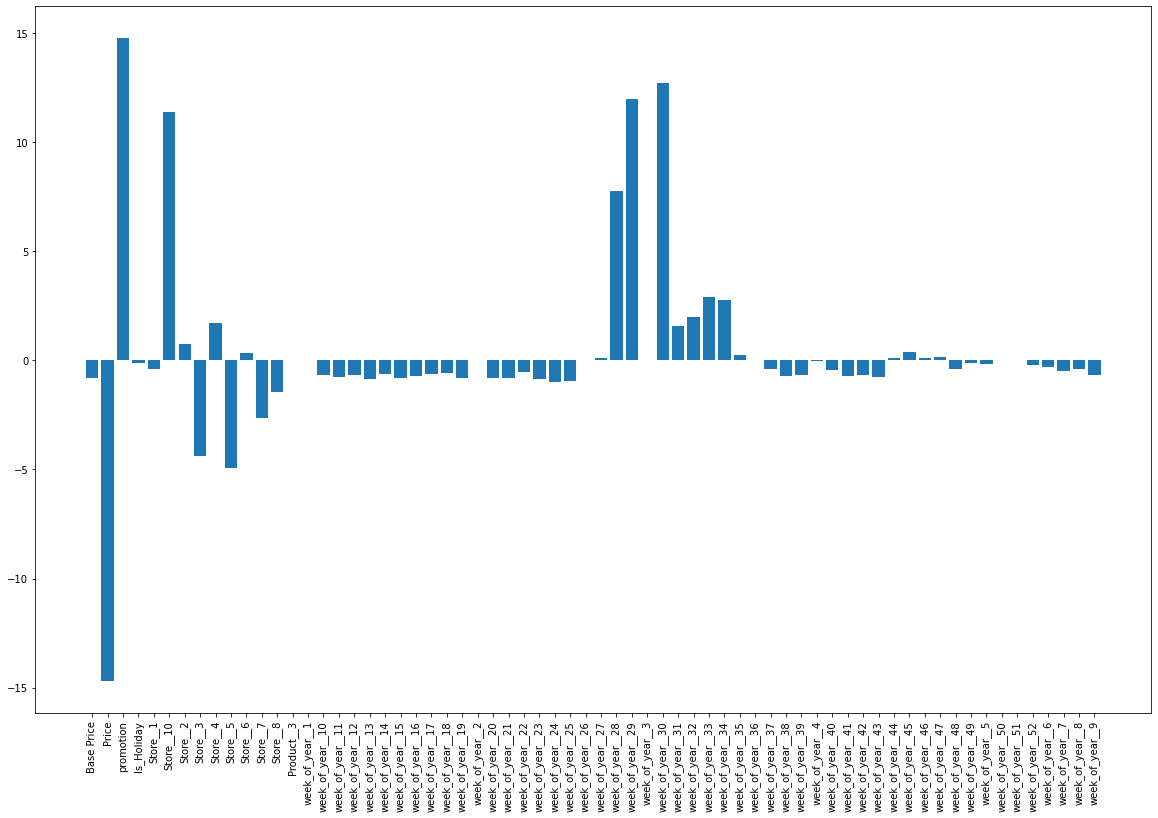

In [28]:
# Visualizing the regression coefficients. 
plt.rcParams["figure.figsize"] = (20,13)
plt.xticks(rotation=90)
plt.bar(X_train.columns, model.coef_)
plt.show()

In [75]:
from sklearn.linear_model import LinearRegression

In [76]:
model=LinearRegression()
scores = cross_val_score(model, X_train_scaled, y_train, cv=7)
scores
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
model.fit(X_train_scaled, y_train)
pred=model.predict(X_test_scaled)

# for classification we use accuracy and F1 score
print(model.score(X_train_scaled,y_train))
print(model.score(X_test_scaled, y_test))


# for regression we use R2 score and MAE(mean absolute error)
# all other steps will be same as classification as shown above

print(mean_absolute_error(y_test,pred))
print(r2_score(y_test,pred))

0.52 accuracy with a standard deviation of 0.11
0.634189732403384
0.44620427152990716
66.40666023977217
0.44620427152990716


In [77]:
# !pip install lightgbm --quiet

## LGBM Regressor

In [78]:
from lightgbm import LGBMRegressor

In [79]:
model=LGBMRegressor()
scores = cross_val_score(model, X_train_scaled, y_train, cv=7)
scores
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
model.fit(X_train_scaled, y_train)
pred=model.predict(X_test_scaled)

# for classification we use accuracy and F1 score
print(model.score(X_train_scaled,y_train))
print(model.score(X_test_scaled, y_test))


# for regression we use R2 score and MAE(mean absolute error)
# all other steps will be same as classification as shown above

print(mean_absolute_error(y_test,pred))
print(r2_score(y_test,pred))

0.50 accuracy with a standard deviation of 0.11
0.6615609028193197
0.671462341501261
48.16415621360376
0.671462341501261


## XGBoost Regressor

In [80]:
from xgboost.sklearn import XGBRegressor

In [81]:
model=XGBRegressor()
scores = cross_val_score(model, X_train_scaled, y_train, cv=7)
scores
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
model.fit(X_train_scaled, y_train)
pred=model.predict(X_test_scaled)

# for classification we use accuracy and F1 score
print(model.score(X_train_scaled,y_train))
print(model.score(X_test_scaled, y_test))


# for regression we use R2 score and MAE(mean absolute error)
# all other steps will be same as classification as shown above

print(mean_absolute_error(y_test,pred))
print(r2_score(y_test,pred))

0.76 accuracy with a standard deviation of 0.17
0.9914275934018283
0.8120795608309641
21.80832105356714
0.8120795608309641


## CatBoost Regressor

In [82]:
# !pip install catboost --quiet

In [83]:
from catboost import CatBoostRegressor

In [84]:
model= CatBoostRegressor()
scores = cross_val_score(model, X_train_scaled, y_train, cv=7)
scores
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
model.fit(X_train_scaled, y_train)
pred=model.predict(X_test_scaled)

# for classification we use accuracy and F1 score
print(model.score(X_train_scaled,y_train))
print(model.score(X_test_scaled, y_test))


# for regression we use R2 score and MAE(mean absolute error)
# all other steps will be same as classification as shown above

print(mean_absolute_error(y_test,pred))
print(r2_score(y_test,pred))

Learning rate set to 0.039732
0:	learn: 237.0957546	total: 1.32ms	remaining: 1.32s
1:	learn: 232.6173007	total: 2.48ms	remaining: 1.24s
2:	learn: 228.0428495	total: 3.54ms	remaining: 1.18s
3:	learn: 223.9388426	total: 4.28ms	remaining: 1.07s
4:	learn: 219.6148897	total: 5.35ms	remaining: 1.06s
5:	learn: 215.9210057	total: 6.27ms	remaining: 1.04s
6:	learn: 212.2986523	total: 7.44ms	remaining: 1.06s
7:	learn: 208.6832252	total: 21ms	remaining: 2.6s
8:	learn: 205.5209334	total: 22.2ms	remaining: 2.44s
9:	learn: 202.0730731	total: 23.2ms	remaining: 2.29s
10:	learn: 199.0073758	total: 24ms	remaining: 2.16s
11:	learn: 196.1132708	total: 25.2ms	remaining: 2.07s
12:	learn: 193.1423909	total: 26.3ms	remaining: 1.99s
13:	learn: 190.6216266	total: 27.2ms	remaining: 1.91s
14:	learn: 188.1821184	total: 28.3ms	remaining: 1.85s
15:	learn: 185.4782577	total: 29.2ms	remaining: 1.8s
16:	learn: 182.6180947	total: 30.2ms	remaining: 1.75s
17:	learn: 179.8288138	total: 31.2ms	remaining: 1.7s
18:	learn: 177.

## Stochastic Gradient Descent Regression

In [85]:
from sklearn.linear_model import SGDRegressor

In [86]:
model=SGDRegressor()
scores = cross_val_score(model, X_train_scaled, y_train, cv=7)
scores
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
model.fit(X_train_scaled, y_train)
pred=model.predict(X_test_scaled)

# for classification we use accuracy and F1 score
print(model.score(X_train_scaled,y_train))
print(model.score(X_test_scaled, y_test))


# for regression we use R2 score and MAE(mean absolute error)
# all other steps will be same as classification as shown above

print(mean_absolute_error(y_test,pred))
print(r2_score(y_test,pred))

0.52 accuracy with a standard deviation of 0.11
0.6272051218033736
0.5012951643684633
64.31907372700623
0.5012951643684633


## Kernel Ridge Regression

In [87]:
from sklearn.kernel_ridge import KernelRidge

In [88]:
model=KernelRidge()
scores = cross_val_score(model, X_train_scaled, y_train, cv=7)
scores
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
model.fit(X_train_scaled, y_train)
pred=model.predict(X_test_scaled)

# for classification we use accuracy and F1 score
print(model.score(X_train_scaled,y_train))
print(model.score(X_test_scaled, y_test))


# for regression we use R2 score and MAE(mean absolute error)
# all other steps will be same as classification as shown above

print(mean_absolute_error(y_test,pred))
print(r2_score(y_test,pred))

-0.07 accuracy with a standard deviation of 0.47
0.25061066241404173
-0.14193965016754806
155.31425324485096
-0.14193965016754806


## Elastic Net Regression

In [89]:
from sklearn.linear_model import ElasticNet

In [90]:
model=ElasticNet()
scores = cross_val_score(model, X_train_scaled, y_train, cv=7)
scores
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
model.fit(X_train_scaled, y_train)
pred=model.predict(X_test_scaled)

# for classification we use accuracy and F1 score
print(model.score(X_train_scaled,y_train))
print(model.score(X_test_scaled, y_test))


# for regression we use R2 score and MAE(mean absolute error)
# all other steps will be same as classification as shown above

print(mean_absolute_error(y_test,pred))
print(r2_score(y_test,pred))

0.56 accuracy with a standard deviation of 0.09
0.5846470922038585
0.5695129263822521
48.99026387322676
0.5695129263822521


## Bayesian Ridge Regression

In [91]:
from sklearn.linear_model import BayesianRidge

In [92]:
model=BayesianRidge()
scores = cross_val_score(model, X_train_scaled, y_train, cv=7)
scores
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
model.fit(X_train_scaled, y_train)
pred=model.predict(X_test_scaled)

# for classification we use accuracy and F1 score
print(model.score(X_train_scaled,y_train))
print(model.score(X_test_scaled, y_test))


# for regression we use R2 score and MAE(mean absolute error)
# all other steps will be same as classification as shown above

print(mean_absolute_error(y_test,pred))
print(r2_score(y_test,pred))

0.56 accuracy with a standard deviation of 0.07
0.6275226957619662
0.4908461991861488
63.14395117647778
0.4908461991861488


## Grid Search CV

In [104]:
from sklearn.model_selection import GridSearchCV

In [106]:
GBR = GradientBoostingRegressor()

parameters = {'learning_rate': [0.05, 0.055, 0.06, 0.065, 0.07],
              'subsample'    : [0.08, 0.075, 0.07, 0.065, 0.06],
              'n_estimators' : [900, 950, 1000, 1050, 1100],
              'max_depth'    : [5, 6, 7, 8, 9]
             }

model=GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
scores = cross_val_score(model, X_train_scaled, y_train, cv=20)
scores
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


model.fit(X_train_scaled, y_train)
pred=model.predict(X_test_scaled)

# for classification we use accuracy and F1 score
print(model.score(X_train_scaled,y_train))
print(model.score(X_test_scaled, y_test))


# for regression we use R2 score and MAE(mean absolute error)
# all other steps will be same as classification as shown above

print(mean_absolute_error(y_test,pred))
print(r2_score(y_test,pred))

0.88 accuracy with a standard deviation of 0.14
0.9891097479662094
0.9493084497202038
17.822477132384176
0.9493084497202038


## Gradient Boosting Regression

In [107]:
from sklearn.ensemble import GradientBoostingRegressor

In [108]:
model=GradientBoostingRegressor()
scores = cross_val_score(model, X_train_scaled, y_train, cv=20)
scores
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


model.fit(X_train_scaled, y_train)
pred=model.predict(X_test_scaled)

# for classification we use accuracy and F1 score
print(model.score(X_train_scaled,y_train))
print(model.score(X_test_scaled, y_test))


# for regression we use R2 score and MAE(mean absolute error)
# all other steps will be same as classification as shown above

print(mean_absolute_error(y_test,pred))
print(r2_score(y_test,pred))

0.83 accuracy with a standard deviation of 0.16
0.960964461631848
0.9381445377237884
22.74209650600759
0.9381445377237884


In [109]:
# save the model
dump(model, open('model.pkl', 'wb'))
# save the scaler
dump(scaler, open('scaler.pkl', 'wb'))

In [112]:
# load the model
model = load(open('model.pkl', 'rb'))
# load the scaler
scaler = load(open('scaler.pkl', 'rb'))

In [50]:
X_test_scaled

array([[ 1.37134861,  0.76612589, -0.43070139, ..., -0.15274095,
        -0.13391225, -0.15274095],
       [-0.72920918,  0.24373472, -0.43070139, ..., -0.15274095,
        -0.13391225, -0.15274095],
       [ 1.37134861,  0.76612589, -0.43070139, ..., -0.15274095,
        -0.13391225, -0.15274095],
       ...,
       [-0.72920918, -2.36560913,  2.32179424, ..., -0.15274095,
        -0.13391225, -0.15274095],
       [-0.72920918,  0.24373472, -0.43070139, ..., -0.15274095,
        -0.13391225, -0.15274095],
       [-0.72920918,  0.24373472, -0.43070139, ..., -0.15274095,
        -0.13391225, -0.15274095]])

## Support Vector Machine

In [98]:
from sklearn.svm import SVR

In [100]:
model=SVR()
scores = cross_val_score(model, X_train_scaled, y_train, cv=20)
scores
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
model.fit(X_train_scaled, y_train)
pred=model.predict(X_test_scaled)

# for classification we use accuracy and F1 score
print(model.score(X_train_scaled,y_train))
print(model.score(X_test_scaled, y_test))


# for regression we use R2 score and MAE(mean absolute error)
# all other steps will be same as classification as shown above

print(mean_absolute_error(y_test,pred))
print(r2_score(y_test,pred))

-0.04 accuracy with a standard deviation of 0.07
-0.03061401423863508
0.003797155761919191
71.42376207704882
0.003797155761919191


## Polynomial Features

In [102]:
# add higher order polynomial features to linear regression
# create instance of polynomial regression class
model = PolynomialFeatures(degree=1)
# create new training data with polynomial features instance
X_train_poly = model.fit_transform(X_train)
# fit with features using linear model
poly_fit = LinearRegression().fit(X_train_poly, y_train)
# check how polynomial (2nd order) model works on train data
training_score =poly_fit.score(X_train_poly, y_train)

# transform test data with poly instance-
# DO NOT fit_transform
X_test_poly = model.transform(X_test)
# check how polynomial (7th order) model works on train data
testing_score = poly_fit.score(X_test_poly, y_test)

score = r2_score(y_test, y_pred)

In [103]:
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")
print('---------------------')
print(f"R2 Score: {score}")

Training Score: 0.6341886758339665
Testing Score: 0.44691364929123345
---------------------
R2 Score: 0.3141372241641497
